In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [3]:
df =pd.read_csv('/content/Bengaluru_House_Data.csv')


In [4]:
print(df.describe() )
print(df.info())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-n

In [5]:
print(df.shape)

(13320, 9)


In [6]:
nums = []
for i in df.columns:
   if df[i].dtype =='float64':
       nums.append(i)
print(nums)

['bath', 'balcony', 'price']


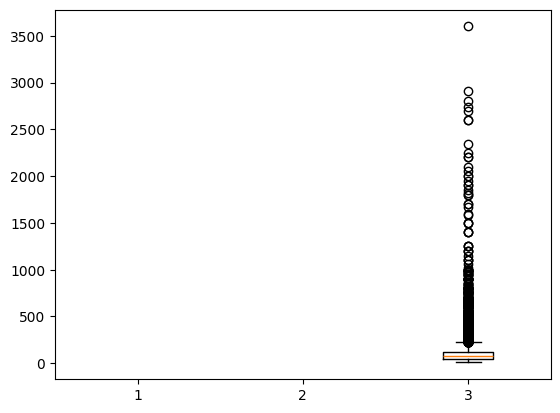

In [7]:
plt.boxplot(df[nums])
plt.show()

In [8]:
dic = {}
for i in df.columns:
    print(i, df[i].isnull().sum())
    dic[i] = df[i].isnull().sum()

holder = pd.DataFrame(list(dic.items()), columns=['Column', 'Missing Values'])


area_type 0
availability 0
location 1
size 16
society 5502
total_sqft 0
bath 73
balcony 609
price 0


In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
   unique_values = df[feature].nunique()
   print(f'Feature: {feature}, Cardinality: {unique_values}')

Feature: area_type, Cardinality: 4
Feature: availability, Cardinality: 81
Feature: location, Cardinality: 1305
Feature: size, Cardinality: 31
Feature: society, Cardinality: 2688
Feature: total_sqft, Cardinality: 2117


In [16]:
for i in nums:
  df[i].fillna(value=df[i].mean(), inplace=True)

<ipython-input-16-641bee731d2e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(value=df[i].mean(), inplace=True)


In [11]:
larg = holder.nlargest(n=2, columns='Missing Values') # Print the resu0lt
print(larg)

    Column  Missing Values
4  society            5502
7  balcony             609


In [12]:
df.drop(columns=larg['Column'])

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
print('numerical values ')
for i in df.select_dtypes(include=['float64', 'int64']).columns:
  print(i)
print('caterogical value')
for i in df.select_dtypes(include=['object']).columns:
  print(i)


numerical values 
bath
balcony
price
caterogical value
area_type
availability
location
size
society
total_sqft


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset (ufrom sklearn.datasets import load_bostonsing Boston housing dataset as an example)

X = df[['bath', 'balcony']]
y = df['price']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy (using Mean Squared Error as an example)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Mean Squared Error:", mse_knn)


KNN Mean Squared Error: 19469.776001728977


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Calculate accuracy (using Mean Squared Error as an example)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)


Decision Tree Mean Squared Error: 16232.906848155528


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy (using Mean Squared Error as an example)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 16604.81794330226


In [24]:
# Print the Mean Squared Error for each model
print("KNN Mean Squared Error:", mse_knn)
print("Decision Tree Mean Squared Error:", mse_dt)
print("Random Forest Mean Squared Error:", mse_rf)


KNN Mean Squared Error: 19469.776001728977
Decision Tree Mean Squared Error: 16232.906848155528
Random Forest Mean Squared Error: 16604.81794330226


In [26]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation for KNN
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
print("KNN Cross-Validation Mean Squared Error:", -knn_scores.mean())

# K-Fold Cross-Validation for Decision Tree
dt_scores = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree Cross-Validation Mean Squared Error:", -dt_scores.mean())

# K-Fold Cross-Validation for Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validation Mean Squared Error:", -rf_scores.mean())


KNN Cross-Validation Mean Squared Error: 18151.229712537985
Decision Tree Cross-Validation Mean Squared Error: 16670.374607476555
Random Forest Cross-Validation Mean Squared Error: 16719.505516345478


In [28]:
from sklearn.model_selection import GridSearchCV

# Grid Search for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Mean Squared Error:", -knn_grid.best_score_)

# Grid Search for Decision Tree
dt_params = {'max_depth': [3, 5, 7, 9], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}  # Changed 'mse' and 'mae' to valid options
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree Mean Squared Error:", -dt_grid.best_score_)

# Grid Search for Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7, 9]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Mean Squared Error:", -rf_grid.best_score_)

Best KNN Parameters: {'n_neighbors': 9}
Best KNN Mean Squared Error: 17928.23526786299
Best Decision Tree Parameters: {'criterion': 'poisson', 'max_depth': 3}
Best Decision Tree Mean Squared Error: 16843.634712333085
Best Random Forest Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Random Forest Mean Squared Error: 16975.18861471574


In [29]:
# Evaluate the best models
best_knn = knn_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Predict on the test set
y_pred_best_knn = best_knn.predict(X_test)
y_pred_best_dt = best_dt.predict(X_test)
y_pred_best_rf = best_rf.predict(X_test)

# Calculate accuracy (using Mean Squared Error as an example)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

# Print the Mean Squared Error for each best model
print("Best KNN Mean Squared Error:", mse_best_knn)
print("Best Decision Tree Mean Squared Error:", mse_best_dt)
print("Best Random Forest Mean Squared Error:", mse_best_rf)


Best KNN Mean Squared Error: 17265.13854797054
Best Decision Tree Mean Squared Error: 15429.361001926105
Best Random Forest Mean Squared Error: 15665.304516588709


In [30]:
# Evaluate the best models
best_knn = knn_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Predict on the test set
y_pred_best_knn = best_knn.predict(X_test)
y_pred_best_dt = best_dt.predict(X_test)
y_pred_best_rf = best_rf.predict(X_test)

# Calculate accuracy (using Mean Squared Error as an example)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

# Print the Mean Squared Error for each best model
print("Best KNN Mean Squared Error:", mse_best_knn)
print("Best Decision Tree Mean Squared Error:", mse_best_dt)
print("Best Random Forest Mean Squared Error:", mse_best_rf)


Best KNN Mean Squared Error: 17265.13854797054
Best Decision Tree Mean Squared Error: 15429.361001926105
Best Random Forest Mean Squared Error: 15665.304516588709
